Customer Segmentation Using KMeans

EDA


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


No null values

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

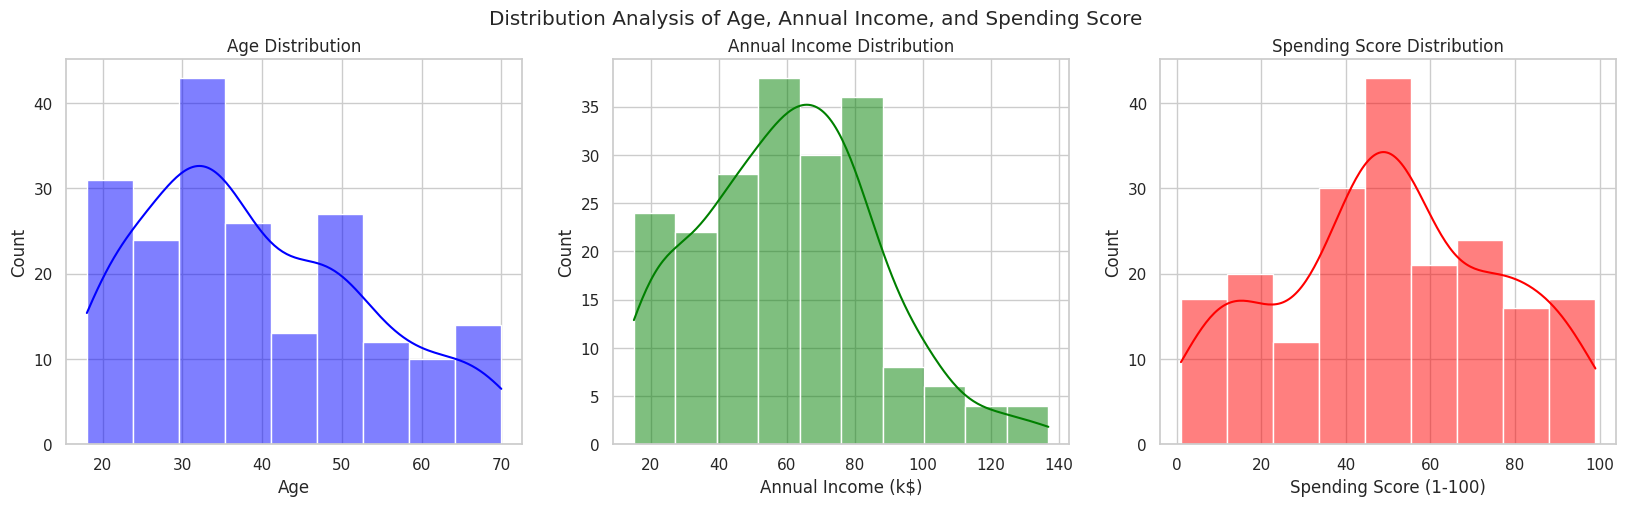

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

The mall’s customer base is predominantly younger, as indicated by the left-skewed age distribution. This suggests that the mall’s offerings are particularly appealing to younger individuals. Similarly, the left-skewed annual income distribution suggests that the mall attracts a wealthier clientele.
The spending score distribution is centered, indicating a balanced mix of low-spending and high-spending customers. This suggests that the mall appeals to a wide range of customers in terms of spending behavior. To gain more detailed insights, the next step is to segment customers into distinct groups using a clustering algorithm based on these features.

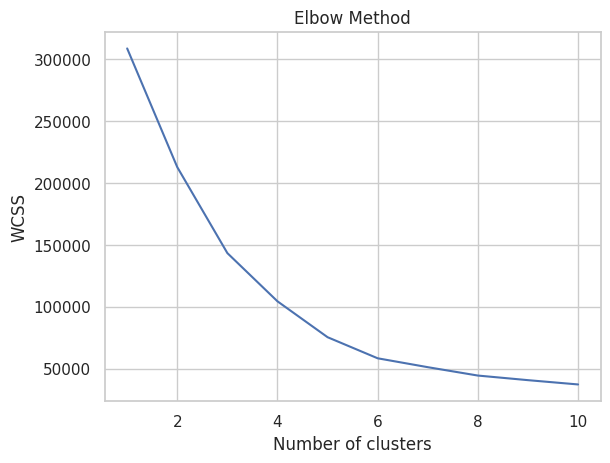

In [11]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


In [13]:
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,25,26,78
4,40,87,17


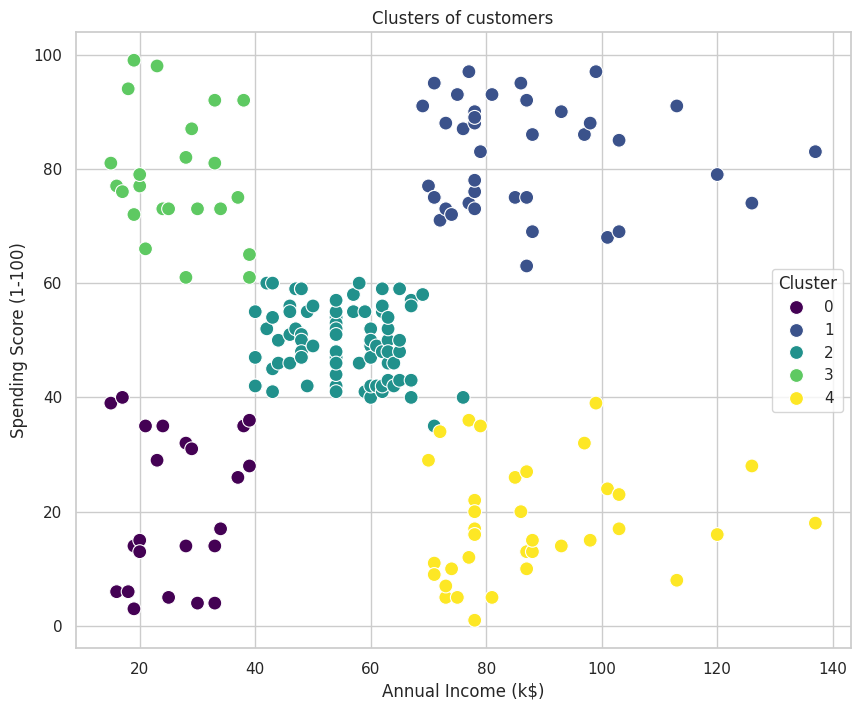

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers')

# Display the plot
plt.show()

The clusters we’ve identified provide a clear picture of different customer segments based on their income and spending habits.Low income, low spending: Customers with an annual income between 20 and 40k and a spending score between 0 and 40. They have lower incomes and tend to spend less.
High income, low spending: Customers with an annual income between 55 and 140k and a spending score between 0 and 40. Despite their higher incomes, they tend to spend less.
Medium income, medium spending: Customers with an annual income between 40 and 80k and a spending score between 40 and 60. These customers have moderate incomes and spending habits. This is the most concentrated cluster, indicating a large number of customers fall into this category.
Low income, high spending: Customers with an annual income between 20 and 40k and a spending score between 60 and 100. Interestingly, these customers have lower incomes but tend to spend more.
High income, high spending: Customers with an annual income between 70 and 140k and a spending score between 60 and 100. These customers have higher incomes and also tend to spend more.

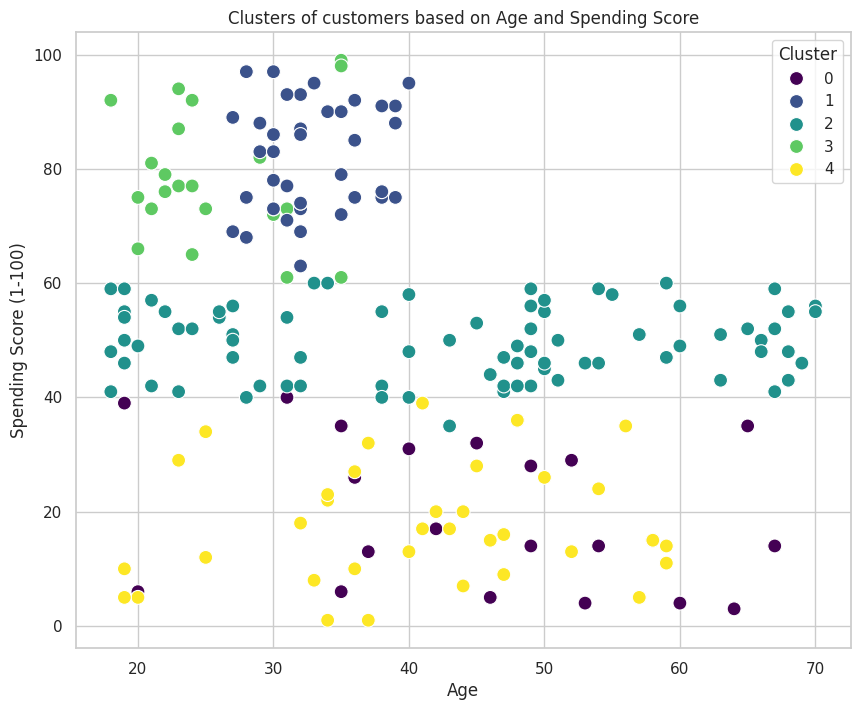

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

Young, high spenders: This cluster represents younger customers who have high spending scores. They might be attracted to trendy items and are willing to spend more. These two clusters include customers in their 20s and 30s with a spending score between 60 and 100. The fact that these clusters are almost overlapping could suggest that age is less of a distinguishing factor among these high-spending customers. These customers are likely to be the mall’s high-value customers due to their high spending scores.
Middle-aged, moderate spenders: This cluster represents customers in their middle age with moderate spending scores. They might be more conservative in their spending habits. This cluster includes ages ranging from 20 to 70 and a spending score between 40 and 60. This is a broad age range, suggesting that the mall attracts customers of various ages who have a moderate spending score. This could be the mall’s primary customer base.
Older, low spenders: This cluster represents older customers who have low spending scores. They might be more frugal or less attracted to the products offered.
The scatter plot allows us to visualize these segments, providing valuable insights into the different types of customers that visit the mall. This information can be used to tailor marketing strategies and product offerings to each specific group.

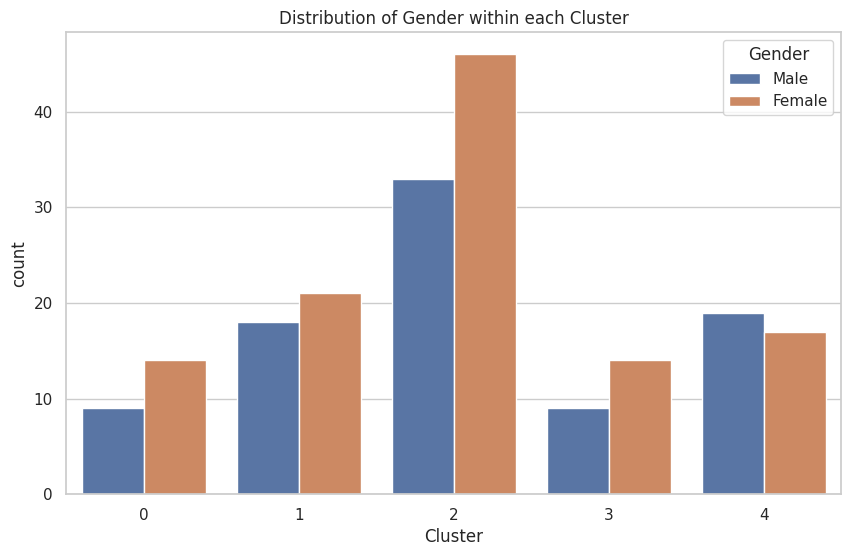

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

# Add a title to the plot
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

The clusters generally exhibit a balanced gender distribution, with a few intriguing deviations. The Cluster 2 stands out with a significantly higher proportion of women. This suggests that middle-aged women with moderate spending habits form a key demographic for this mall.
Interestingly, the Cluster 3 is the only cluster where men slightly outnumber women. This could indicate different shopping habits or preferences between the genders as they age. In all other clusters, women are the majority, indicating that they form a significant part of the mall’s customer base.

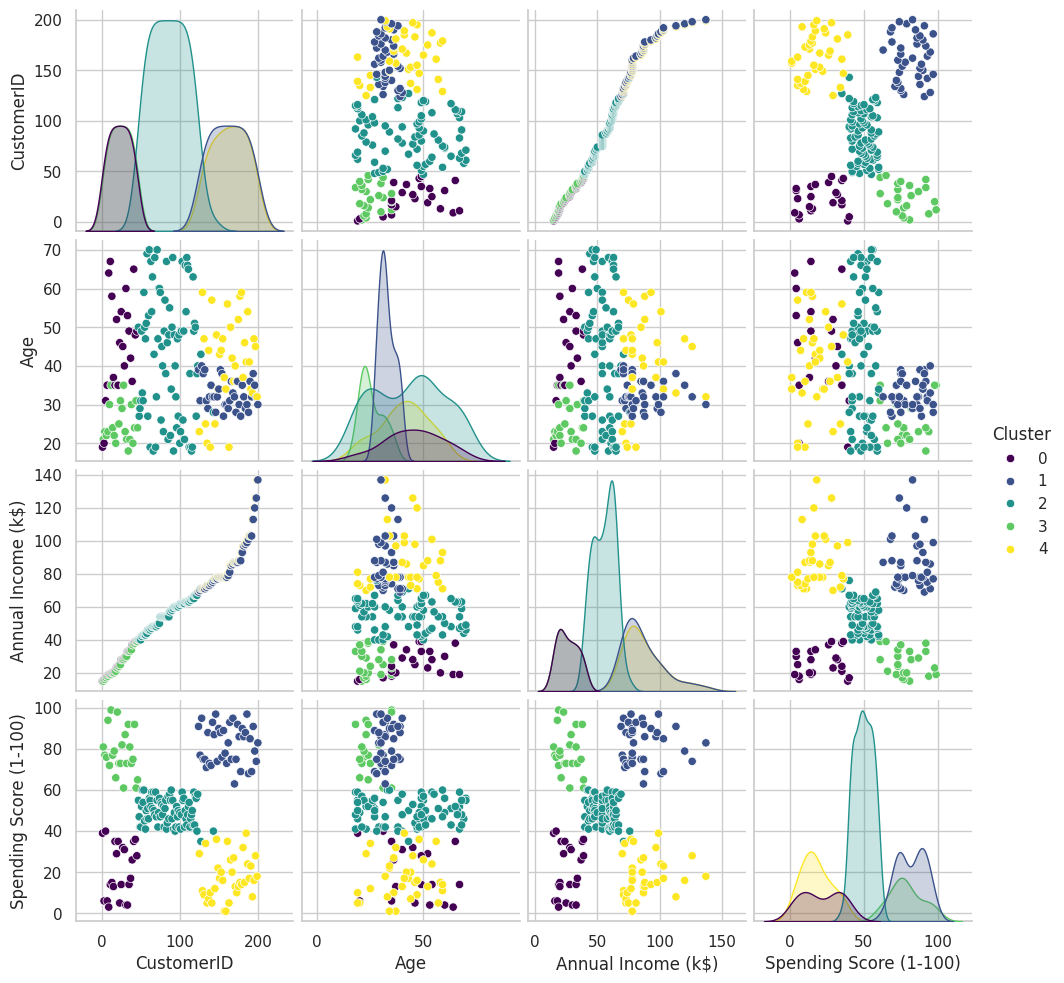

In [17]:
#pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')

# Display the plot
plt.show()

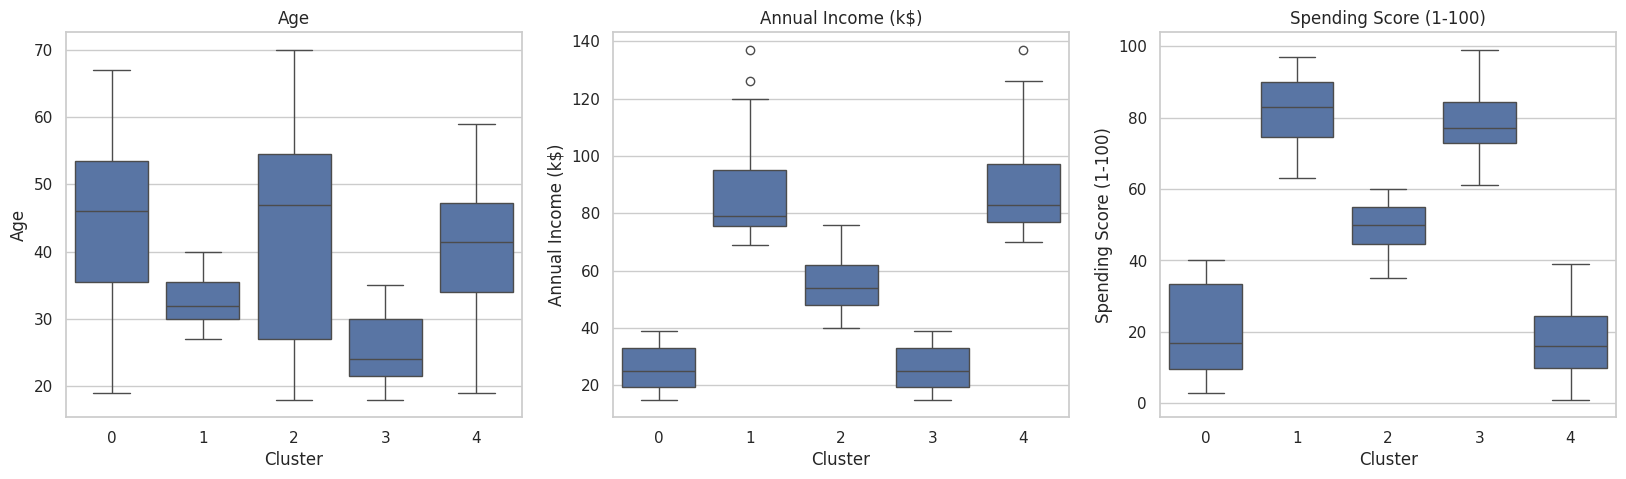

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot for 'Age'
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

# Display the plots
plt.show()

By comparing the boxplots, we can observe how the clusters differ in terms of these features. For instance, we might find that one cluster has a higher median annual income compared to the others, or that the age range is wider for one cluster than for the rest.

In [19]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the clustering
silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])

# Print the silhouette score
print('Silhouette Score: ', silhouette_score)

Silhouette Score:  0.44428597560893024


Our silhouette score of 0.44 suggests reasonable clustering, but there’s room for improvement.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

# Create a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the scaled features
kmeans.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Scaled_Cluster'] = kmeans.labels_

# Compute the silhouette score for the new clustering
scaled_silhouette_score = silhouette_score(scaled_features, df['Scaled_Cluster'])

# Print the silhouette score
print('Scaled Silhouette Score:', scaled_silhouette_score)

Scaled Silhouette Score: 0.41664341513732767


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score after scaling the features has slightly decreased from 0.44 to 0.416. This might seem counterintuitive as scaling is generally a good practice before applying KMeans clustering.

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the AgglomerativeClustering object to the scaled features
agg_clustering.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Agg_Cluster'] = agg_clustering.labels_

# Compute the silhouette score for the new clustering
agg_silhouette_score = silhouette_score(scaled_features, df['Agg_Cluster'])

# Print the silhouette score
print('Agglomerative Clustering Silhouette Score: ', agg_silhouette_score)

Agglomerative Clustering Silhouette Score:  0.39002826186267214


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Creating a PCA object with two components
pca = PCA(n_components=2)

# Fitting the PCA to the scaled features and transforming them
pca_features = pca.fit_transform(scaled_features)

# Creating a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the KMeans to the PCA features
kmeans.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['PCA_Cluster'] = kmeans.labels_

# Calculating the silhouette score for the new clustering
pca_silhouette_score = silhouette_score(pca_features, df['PCA_Cluster'])

# Printing the silhouette score
print('PCA Silhouette Score: ', pca_silhouette_score)

PCA Silhouette Score:  0.39308250061186906


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
from sklearn.cluster import DBSCAN

# Creating a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fitting the DBSCAN object to the PCA features
dbscan.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Calculating the silhouette score for the new clustering
dbscan_silhouette_score = silhouette_score(pca_features, df['DBSCAN_Cluster'])

# Printing the silhouette score
print('DBSCAN Silhouette Score: ', dbscan_silhouette_score)

DBSCAN Silhouette Score:  0.3203118288175695


The silhouette score for DBSCAN is 0.3203. This is indeed lower than the silhouette scores obtained from the previous KMeans and Agglomerative clustering. A lower silhouette score indicates that the clusters are less dense and/or less well separated than in the previous clustering solutions.

In [25]:
# Calculating the mean characteristics of each cluster
cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(0).astype(int)

# Displaying the characteristics of each cluster
cluster_characteristics


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,21
1,33,87,82
2,43,55,50
3,26,26,79
4,41,88,18


Cluster 0: “Conservative Middle-Aged” — This cluster tends to include middle-aged individuals (average age 45) with relatively low annual income (average $26k).  

Their spending score is also low (average 21),which suggests they might be more conservative with their spending, possibly due to their lower income. This group might be less responsive to marketing efforts aimed at increasing spending.
Cluster 1: “Young High Earners” — This cluster includes younger individuals (average age 32) with high annual income (average $86k).

They also have a high spending score (average 82), indicating they spend a significant portion of their income. This group could be a key target for marketing campaigns, as they have both the means and the willingness to spend.
Cluster 2: “Balanced Middle-Aged” — This cluster is made up of middle-aged individuals (average age 43) with moderate annual income (average $55k).

Their spending score is around the middle of the range (average 49), suggesting a balanced approach to spending. Marketing strategies for this group might need to focus on value and quality, as they might be more discerning with their spending.
Cluster 3: “Wealthy Savers” — This cluster includes individuals around middle age (average age 40) with high annual income (average $87k),

but their spending score is low (average 17). This suggests that despite their high income, they are conservative with their spending. Understanding why this group is not spending commensurate with their income could be a key insight. They might value saving, or they might not see value in the current offerings.
Cluster 4: “Young Spenders” — This cluster includes young individuals (average age 25) with low annual income (average $26k), but their spending score is high (average 78). This suggests that these individuals, despite having lower income, are willing to spend a significant portion of it. They might be impulse buyers, or they might value experiences or products over saving money.